# Model selection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib as mpl

viridis = cm.get_cmap('viridis', 12)

In [2]:
# Import a dataset to perform the model selection.

filename = './data/mergers_s0.0_M9.0_r1.0.txt' 
data= np.loadtxt(filename)

In [3]:
N, N_features = data.shape
print('Number of simulations:', N)
print('Number of features:', N_features)

Number of simulations: 1344899
Number of features: 28


In [4]:
labels=['channel', 'a','e', 'm1','m2','chi1','chi2','g1','g2',
        'tform','tmerge','zform','zmerge','Nhar','Nsub','q',
        'chieff', 'theta1', 'theta2', 'dphi','mrem', 'chirem', 'gren', 'vgw', 'j1', 'j2', 'Mcl_0', 'zcl_form']
df = pd.DataFrame(data, columns=labels)

In [5]:
df.head()

,channel,a,e,m1,m2,chi1,chi2,g1,g2,tform,...,theta2,dphi,mrem,chirem,gren,vgw,j1,j2,Mcl_0,zcl_form
0,5.0,0.978309,0.996670,20.790987,12.336110,0.0,0.0,1.0,1.0,18.362000,...,0.392135,4.984316,31.700747,0.649641,2.0,130.931209,-1.0,-1.0,12888.816742,1.250897
1,-3.0,6.702134,0.995662,34.470446,31.889372,0.0,0.0,1.0,1.0,73.285439,...,1.901029,3.163030,63.164880,0.685606,2.0,22.331555,-1.0,-1.0,42163.685772,1.194744
2,3.0,0.256967,0.971449,17.907252,17.002206,0.0,0.0,1.0,1.0,42.904397,...,0.062181,3.356530,33.226307,0.686080,2.0,14.906361,-1.0,-1.0,22196.974995,1.776938
3,3.0,0.739653,0.994634,18.405631,17.383702,0.0,0.0,1.0,1.0,149.650147,...,2.077434,6.191221,34.064181,0.686000,2.0,16.413660,-1.0,-1.0,34921.078247,1.367674
4,3.0,0.874546,0.994198,25.502288,25.220131,0.0,0.0,1.0,1.0,15.597047,...,1.370047,4.119944,48.274177,0.686443,2.0,3.201898,-1.0,-1.0,20052.828644,3.856054


In [6]:
df.describe()

,channel,a,e,m1,m2,chi1,chi2,g1,g2,tform,...,theta2,dphi,mrem,chirem,gren,vgw,j1,j2,Mcl_0,zcl_form
count,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,...,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06,1.344899e+06
mean,6.823241e-01,6.173609e+02,9.623462e-01,2.658857e+01,2.196669e+01,3.918913e-02,6.762683e-03,1.057585e+00,1.009941e+00,6.887642e+02,...,1.570776e+00,3.143401e+00,4.629058e+01,6.746863e-01,2.058123e+00,8.663657e+01,2.672312e-01,-6.558983e-01,5.240020e+05,3.127127e+00
std,2.726390e+00,2.069602e+05,9.677597e-02,1.250332e+01,1.049393e+01,1.590561e-01,6.754344e-02,2.344397e-01,9.930281e-02,1.269161e+03,...,6.832676e-01,1.813610e+00,2.105612e+01,4.096967e-02,2.354799e-01,2.061153e+02,9.141496e+00,5.192956e+00,1.120053e+06,1.935594e+00
min,-5.000000e+00,1.240868e-06,1.203463e-03,3.795456e+00,3.020996e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,1.022821e-03,4.341349e-06,7.198234e+00,1.194639e-02,2.000000e+00,3.724445e-06,-1.000000e+00,-1.000000e+00,1.000000e+04,4.926467e-03
25%,-3.000000e+00,3.412141e-01,9.741705e-01,1.751999e+01,1.383531e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.982971e+01,...,1.046953e+00,1.573594e+00,3.043149e+01,6.775819e-01,2.000000e+00,9.469107e+00,-1.000000e+00,-1.000000e+00,2.201814e+04,1.853749e+00
50%,2.000000e+00,7.398058e-01,9.905756e-01,2.589422e+01,2.125690e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.717696e+02,...,1.570971e+00,3.144998e+00,4.517885e+01,6.852467e-01,2.000000e+00,3.014580e+01,-1.000000e+00,-1.000000e+00,1.047102e+05,2.655745e+00
75%,3.000000e+00,1.718890e+00,9.971315e-01,3.383989e+01,2.973730e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,7.565696e+02,...,2.093927e+00,4.712958e+00,6.029710e+01,6.863551e-01,2.000000e+00,7.981851e+01,-1.000000e+00,-1.000000e+00,4.890092e+05,3.823787e+00
max,5.000000e+00,2.096799e+08,1.000000e+00,1.890189e+02,1.008853e+02,8.820740e-01,8.263096e-01,4.000000e+00,3.000000e+00,1.296194e+04,...,3.139706e+00,6.283183e+00,2.641252e+02,9.028909e-01,5.000000e+00,2.802448e+03,5.710000e+02,5.640000e+02,9.982274e+06,1.199974e+01


In [7]:
# It's hard to keep track of a million simulations. We'll take a smaller subset, chosen randomly. 

import random

np.random.seed(1234) # for reproducible results

N_subset = 100000
indices = np.random.randint(0,N, size =(N_subset,))
df_subset= df.iloc[indices]

### Outlier analysis

In [8]:
# Quick outlier analysis.

print('=========== PRE REMOVAL ============')
mask = np.where( np.logical_and(df_subset['g1'].values != 1 , df_subset['g1'].values != 2))
print('Values >2g for first BH in binary', df_subset['g1'].values[mask])
mask = np.where( np.logical_and(df_subset['g2'].values != 1 , df_subset['g2'].values != 2))
print('Values >2g for second BH in binary', df_subset['g2'].values[mask])

# remove generation of BH above 2nd.
df_subset = df_subset[df_subset[['g1']].values<=2]
df_subset = df_subset[df_subset[['g2']].values<=2]

print('========== POST REMOVAL ============')
mask = np.where( np.logical_and(df_subset['g1'].values != 1 , df_subset['g1'].values != 2))
print('Values >2g for first BH in binary', df_subset['g1'].values[mask])
mask = np.where( np.logical_and(df_subset['g2'].values != 1 , df_subset['g2'].values != 2))
print('Values >2g for second BH in binary', df_subset['g2'].values[mask])

=========== PRE REMOVAL ============
Values >2g for first BH in binary [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 4.]
Values >2g for second BH in binary [3. 3. 3.]
========== POST REMOVAL ============
Values >2g for first BH in binary []
Values >2g for second BH in binary []


### Data wrangling

In [9]:
# Take absolute value of channel, forget whether remnant BH is ejected or not.

df_subset['channel'] = abs(df_subset['channel'])
np.where(df_subset['channel']<0)

(array([], dtype=int64),)

In [10]:
#Add three new columns.

N_BHs = len(df_subset.values) # New number of rows.

df_subset.insert(1, "binary_generation", list(np.arange(0,N_BHs)))

In [11]:
#Create masks for 1g+1g, 1g+2g and 2g+2g events.
mask1g1g = np.logical_and(df_subset['g1']==1, df_subset['g2']==1)
mask1g2g = np.logical_or(np.logical_and(df_subset['g1']==1, df_subset['g2']==2), 
                         np.logical_and(df_subset['g1']==2, df_subset['g2']==1))
mask2g2g = np.logical_and(df_subset['g1']==2, df_subset['g2']==2)

In [12]:
# Assign new values.

df_subset['binary_generation'] = df_subset['binary_generation'].mask(mask1g1g, 1).mask(mask1g2g, 2).mask(mask2g2g,3)

In [13]:
# Check the unicity of the 1g1g, 1g2g and 2g2g columns.

print('binary_generation:', df_subset['binary_generation'].unique())

binary_generation: [1 2 3]


(-) indicates remnant BH was ejected from cluster.
- (-)1: exchange processes
- (-)2: two-body capture
- (-)3: three-BH binary induced
- (-)4: von Zeipel-Lidov-Kozai merger

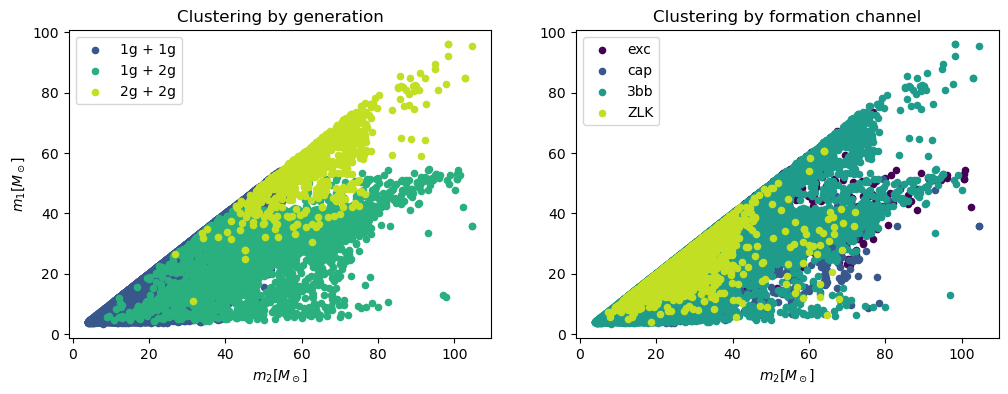

In [17]:
# Plot

fig,ax = plt.subplots(1,2,figsize=(12,4))

# Scatter plot by generation.

ax[0].scatter(df_subset[['m1']][mask1g1g].values,df_subset[['m2']][mask1g1g].values, 
              s=20, label='1g + 1g', color=viridis(0.3))
ax[0].scatter(df_subset[['m1']][mask1g2g].values,df_subset[['m2']][mask1g2g].values, 
              s=20, label='1g + 2g', color=viridis(0.6))
ax[0].scatter(df_subset[['m1']][mask2g2g].values,df_subset[['m2']][mask2g2g].values, 
              s=20, label='2g + 2g', color=viridis(0.9))
ax[0].set_title('Clustering by generation')
ax[0].set_ylabel(r'$m_1 [M_\odot]$')
ax[0].set_xlabel(r'$m_2 [M_\odot]$')
ax[0].legend()

# Scatter plot by channel.

ax[1].scatter(df_subset[['m1']][df_subset['channel'] == 1].values,
              df_subset[['m2']][df_subset['channel'] == 1].values, 
              s=20, label='exc', color=viridis(0.0))
ax[1].scatter(df_subset[['m1']][df_subset['channel'] == 2].values,
              df_subset[['m2']][df_subset['channel'] == 2].values, 
              s=20, label='cap', color=viridis(0.25))
ax[1].scatter(df_subset[['m1']][df_subset['channel'] == 3].values,
              df_subset[['m2']][df_subset['channel'] == 3].values, 
              s=20, label = '3bb', color=viridis(0.5))
ax[1].scatter(df_subset[['m1']][df_subset['channel'] == 4].values,
              df_subset[['m2']][df_subset['channel'] == 4].values, 
              s=20, label = 'ZLK', color=viridis(0.9))
ax[1].set_title('Clustering by formation channel')
ax[1].set_xlabel(r'$m_2 [M_\odot]$')
ax[1].legend()

### Feature engineering

In [18]:
# after some trial and errors these are the parameters that correlate more with XgYg.
# We removed 1g2g and 2g2g because they are positively correlated with 1g1g and may skew the analysis.

df_feature = df_subset[['binary_generation',  'm1','m2','chi1','chi2']]

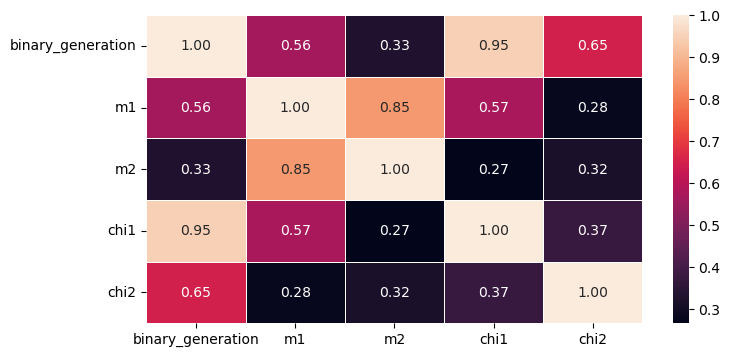

In [19]:
# Check correlations
plt.subplots(figsize=(8,4))
sns.heatmap(df_feature.corr(), annot=True, linewidths=0.5,fmt = "1.2f")
plt.show()

## The binary classification problem

*When is a given event 1g+1g or when is it more than 1g?* **one vs all problem**

In [20]:
# Import packages sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
# Find predictors and target variable.

y = df_feature["binary_generation"]
X = df_feature.drop("binary_generation", axis=1)

In [22]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [23]:
print('X shape train:', X_train.shape)
print('X shape test:', X_test.shape)
print('y shape train:', y_train.shape)
print('y shape test:', y_test.shape)

X shape train: (69976, 4)
X shape test: (29991, 4)
y shape train: (69976,)
y shape test: (29991,)


### Utils

In [24]:
def plot_predictions(y_test, y_pred, lab, title):
    
    """
    Plot the predictions from a given model.
    
    Input: 
    
    y_test, y_pred: predictions and test results from the ML model.
    lab: label (1=1g+1g, 2 = 1g+2g or 2g+1g, 3= 2g+2g).
    title: title for the plot.
    """
    
    loc2g_test = np.where(y_test==lab)[0]
    df_2g_test = df_feature.iloc[loc2g_test]
    
    loc2g_pred = np.where(y_pred==lab)[0]
    df_2g_pred = df_feature.iloc[loc2g_pred]
    
    loc2g_mismatch = np.where(y_test!=y_pred)[0]
    df_2g_mismatch = df_feature.iloc[loc2g_mismatch]
    
    plt.subplots(figsize=(10,2))
    
    # Plot scatter 
    plt.scatter(df_2g_test[['m1']].values,df_2g_test[['m2']].values, color='k',  s=30, label='Test')
    plt.scatter(df_2g_pred[['m1']].values,df_2g_pred[['m2']].values, color='orange', s=10, label='Predicted')
    plt.scatter(df_2g_mismatch[['m1']].values,df_2g_mismatch[['m2']].values, 
                color='red',marker='*', s=30, label='Mis-predicted')
    plt.title(title+'_score:'+ str(accuracy_score(y_pred, y_test))
              +'_N_test:'+ str(len(np.where(y_test==lab)[0]))
              +'_N_pred:'+str(len(np.where(y_pred==lab)[0])))
    plt.ylabel(r'$m_1 [M_\odot]$')
    plt.xlabel(r'$m_2 [M_\odot]$')
    plt.legend(fontsize = 10)

### Gaussian Naive Bayes

In [25]:
# https://scikit-learn.org/stable/modules/naive_bayes.html

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

NB_gauss = GaussianNB()

# Choose the activation function below.
NB_gauss.fit(X_train, y_train)
y_pred_NBgauss = NB_gauss.predict(X_test)

We also tried the sigmoid and isotonic activation functions from the docs (https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration.html#sphx-glr-auto-examples-calibration-plot-calibration-py), but they underpredict the number of binaries and they are generally less robust.

In [26]:
print('Accuracy score:', accuracy_score(y_pred_NBgauss, y_test))
for lab in [1,2,3]:
    print('The test population has ', len(np.where(y_test==lab)[0]) ,' binaries.')
    print('The model predicts ', len(np.where(y_pred_NBgauss==lab)[0]) ,' binaries.')

Accuracy score: 0.9999666566636658
The test population has  28252  binaries.
The model predicts  28252  binaries.
The test population has  1444  binaries.
The model predicts  1445  binaries.
The test population has  295  binaries.
The model predicts  294  binaries.


### Multinomial Naive Bayes

In [27]:
# https://scikit-learn.org/stable/modules/naive_bayes.html

# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

NB_multinomial = MultinomialNB()
NB_multinomial.fit(X_train, y_train)

y_pred_NBmulti = NB_multinomial.predict(X_test)

In [28]:
print('Accuracy score:', accuracy_score(y_pred_NBmulti, y_test))
for lab in [1,2,3]:
    print('The test population has ', len(np.where(y_test==lab)[0]) ,' binaries.')
    print('The model predicts ', len(np.where(y_pred_NBmulti==lab)[0]) ,' binaries.')

Accuracy score: 0.9936981094328299
The test population has  28252  binaries.
The model predicts  28127  binaries.
The test population has  1444  binaries.
The model predicts  1527  binaries.
The test population has  295  binaries.
The model predicts  337  binaries.


### SVM

In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


clf_SVC = SVC(kernel='sigmoid') # kernel in the decision boundary. 
clf_SVC.fit(X_train, y_train)

y_pred_SVC = clf_SVC.predict(X_test)

In [30]:
print('Accuracy score:', accuracy_score(y_pred_SVC, y_test))
for lab in [1,2,3]:
    print('The test population has ', len(np.where(y_test==lab)[0]) ,' binaries.')
    print('The model predicts ', len(np.where(y_pred_SVC==lab)[0]) ,' binaries.')

Accuracy score: 0.9420159381147678
The test population has  28252  binaries.
The model predicts  29991  binaries.
The test population has  1444  binaries.
The model predicts  0  binaries.
The test population has  295  binaries.
The model predicts  0  binaries.


### K-means clustering

In [31]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit_transform(X_train, y_train); # Transforming data to see if it works well.

y_pred_kmeans = kmeans.predict(X_test)

In [32]:
print('Accuracy score:', accuracy_score(y_pred_kmeans, y_test))
for lab in [1,2,3]:
    print('The test population has ', len(np.where(y_test==lab)[0]) ,' binaries.')
    print('The model predicts ', len(np.where(y_pred_kmeans==lab)[0]) ,' binaries.')

Accuracy score: 0.40438798306158513
The test population has  28252  binaries.
The model predicts  13737  binaries.
The test population has  1444  binaries.
The model predicts  0  binaries.
The test population has  295  binaries.
The model predicts  0  binaries.


### Logistic regression

In [33]:
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
# ALSO USEFUL: https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati
# https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102


from sklearn.linear_model import LogisticRegression

# For small datasets, ‘liblinear’ is a good choice
# ‘liblinear’ is limited to one-versus-rest schemes.
# https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
LogReg = LogisticRegression(penalty='l1', solver='liblinear', max_iter = 100)
LogReg.fit(X_train, y_train);

y_pred_LogReg = LogReg.predict(X_test)

In [34]:
print('Accuracy score:', accuracy_score(y_pred_LogReg, y_test))
for lab in [1,2,3]:
    print('The test population has ', len(np.where(y_test==lab)[0]) ,' binaries.')
    print('The model predicts ', len(np.where(y_pred_LogReg==lab)[0]) ,' binaries.')

Accuracy score: 0.9992997899369811
The test population has  28252  binaries.
The model predicts  28259  binaries.
The test population has  1444  binaries.
The model predicts  1425  binaries.
The test population has  295  binaries.
The model predicts  307  binaries.


### Decision Tree classifier

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_DT = DecisionTreeClassifier(max_leaf_nodes=3, 
                                criterion = 'gini', # to quantify information gain at each node.
                                splitter = 'random', #
                                random_state=1)
clf_DT.fit(X_train, y_train)

y_pred_DT = clf_DT.predict(X_test)

In [36]:
print('Accuracy score:', accuracy_score(y_pred_DT, y_test))
for lab in [1,2,3]:
    print('The test population has ', len(np.where(y_test==lab)[0]) ,' binaries.')
    print('The model predicts ', len(np.where(y_pred_DT==lab)[0]) ,' binaries.')

Accuracy score: 0.9993331332733153
The test population has  28252  binaries.
The model predicts  28272  binaries.
The test population has  1444  binaries.
The model predicts  1424  binaries.
The test population has  295  binaries.
The model predicts  295  binaries.


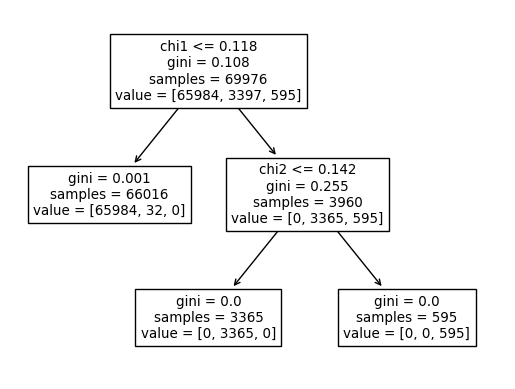

In [37]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
#https://scikit-learn.org/stable/modules/tree.html#tree

feature_names = X.columns

tree.plot_tree(clf_DT, feature_names = feature_names, rounded=False)
plt.show()

### Random Forest

In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators = 10, # Number of trees in the forest.
                                bootstrap = True   # Whether bootstrap samples are used when building trees 
                               )
clf_RF.fit(X_train, y_train)

y_pred_RF = clf_RF.predict(X_test)

In [39]:
print('Accuracy score:', accuracy_score(y_pred_RF, y_test))
for lab in [1,2,3]:
    print('The test population has ', len(np.where(y_test==lab)[0]) ,' binaries.')
    print('The model predicts ', len(np.where(y_pred_RF==lab)[0]) ,' binaries.')

Accuracy score: 1.0
The test population has  28252  binaries.
The model predicts  28252  binaries.
The test population has  1444  binaries.
The model predicts  1444  binaries.
The test population has  295  binaries.
The model predicts  295  binaries.


In [40]:
# Accuracy with (m1, m2, chi1) =   0.9981327731652829
# Accuracy with (m1, chi1)     =   0.9877963389016705
# Accuracy with (m1, m2)       =   0.9834950485145544

### XGBoost

In [41]:
from xgboost import XGBClassifier

clf_XGBoost = XGBClassifier()
clf_XGBoost.fit(X_train, y_train)

y_pred_XGBoost = clf_XGBoost.predict(X_test)

In [42]:
print('Accuracy score:', accuracy_score(y_pred_XGBoost, y_test))
for lab in [1,2,3]:
    print('The test population has ', len(np.where(y_test==lab)[0]) ,' binaries.')
    print('The model predicts ', len(np.where(y_pred_XGBoost==lab)[0]) ,' binaries.')

Accuracy score: 1.0
The test population has  28252  binaries.
The model predicts  28252  binaries.
The test population has  1444  binaries.
The model predicts  1444  binaries.
The test population has  295  binaries.
The model predicts  295  binaries.


### Model comparison

It's important to show also the (mis)-predictions. 

For instance, SVM predicts a number of 2g binaries comparable to the actual number in the test set. However, all the predictions are off-target, which effectively renders the model inefficient.

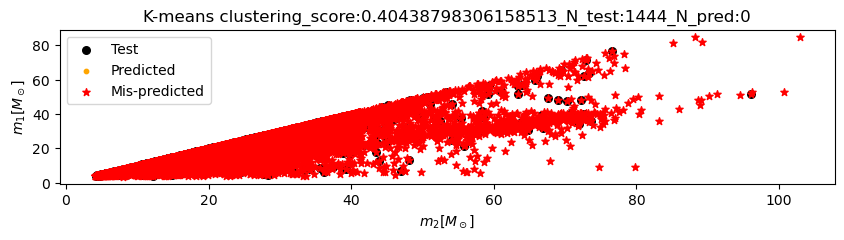

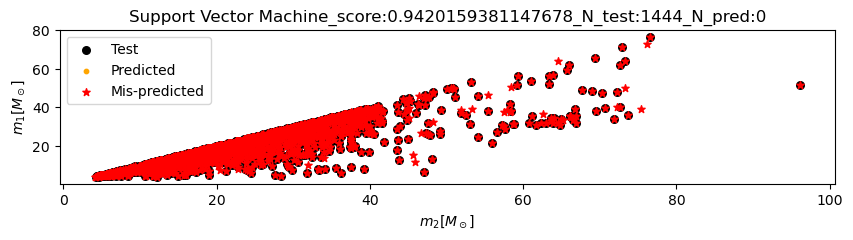

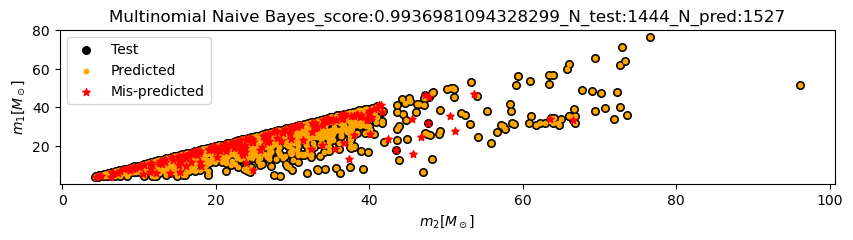

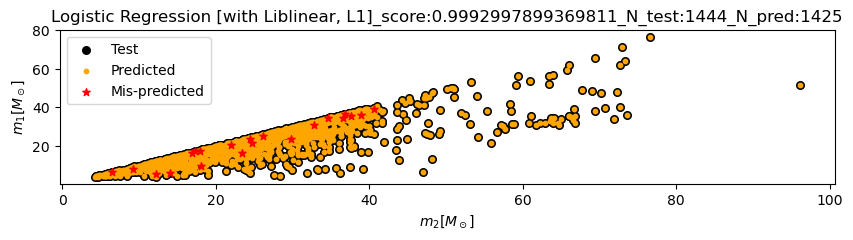

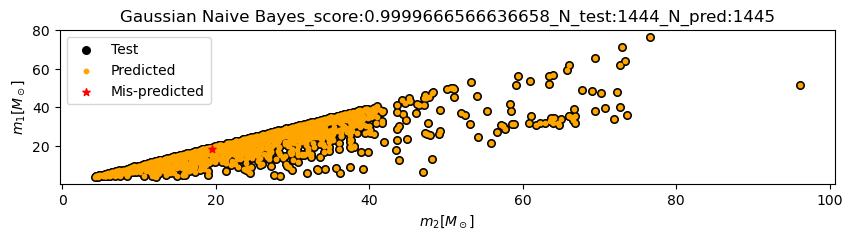

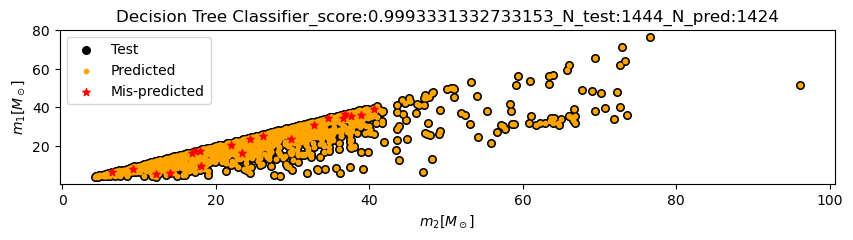

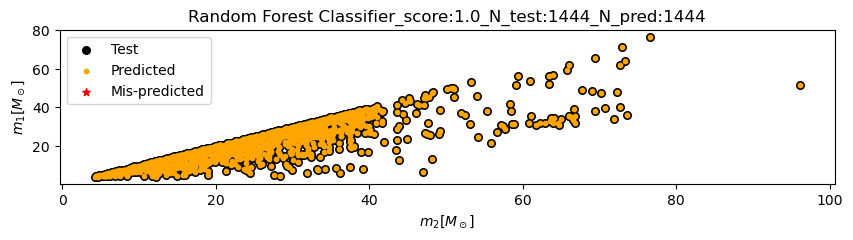

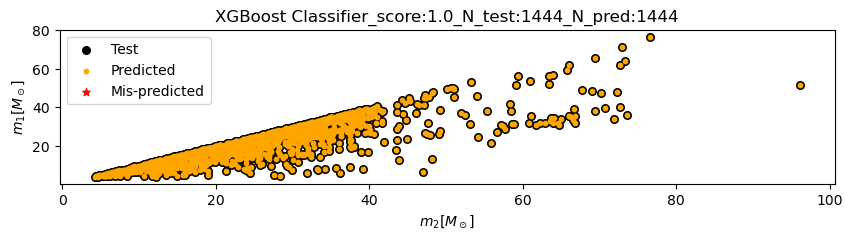

In [43]:
lab = 2 # Choose a label to predict: 1 for 1g+1g, 2 for 1g+2g (2g+1g), 3 for 2g+2g.

plot_predictions(y_test,y_pred_kmeans,lab,  'K-means clustering')
plot_predictions(y_test,y_pred_SVC,lab,     'Support Vector Machine')
plot_predictions(y_test,y_pred_NBmulti,lab, 'Multinomial Naive Bayes')
plot_predictions(y_test,y_pred_LogReg,lab,  'Logistic Regression [with Liblinear, L1]')
plot_predictions(y_test,y_pred_NBgauss,lab, 'Gaussian Naive Bayes')
plot_predictions(y_test,y_pred_DT,lab,      'Decision Tree Classifier')
plot_predictions(y_test,y_pred_RF,lab,      'Random Forest Classifier')
plot_predictions(y_test,y_pred_XGBoost,lab, 'XGBoost Classifier')

This can be quantified better with the confusion matrix

Text(0.5, 80.7222222222222, 'Predicted label')

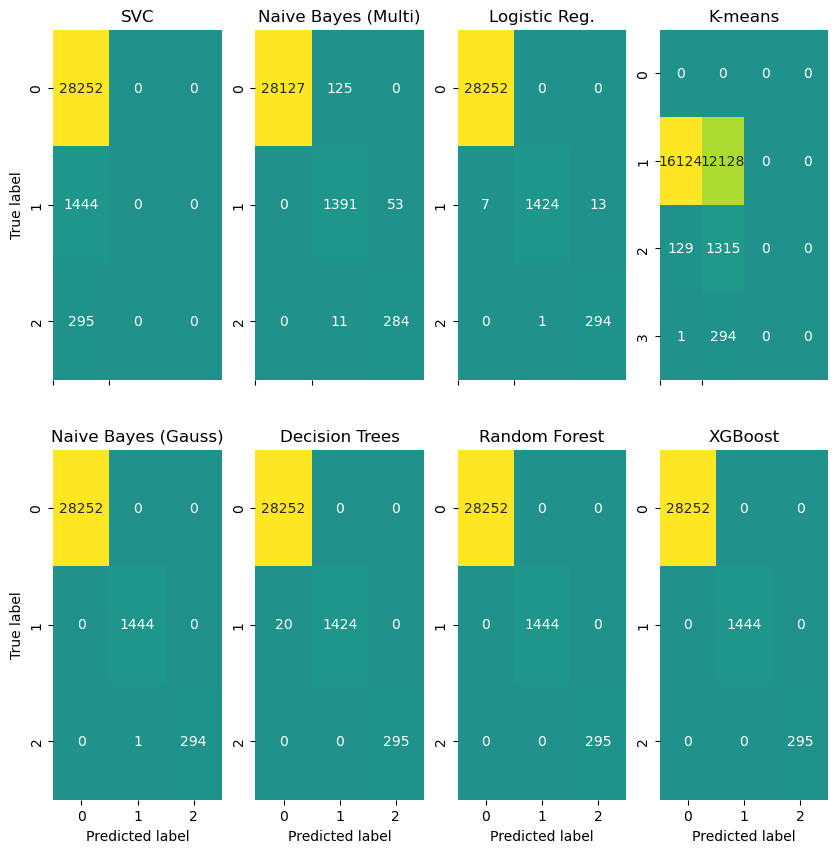

In [44]:
fig, ax = plt.subplots(2,4, figsize = (10,10))

sns.heatmap(confusion_matrix(y_test,y_pred_SVC),annot=True,fmt="d", center=0, 
            cbar = False, cmap='viridis', ax = ax[0,0]) 
ax[0,0].set_title("SVC")
ax[0,0].set_ylabel('True label')
ax[0,0].set_xticks([0,1],color='w')

sns.heatmap(confusion_matrix(y_test,y_pred_NBmulti),annot=True,fmt="d", center=0, 
            cbar = False,cmap='viridis', ax = ax[0,1]) 
ax[0,1].set_title("Naive Bayes (Multi)")
ax[0,1].set_xticks([0,1],color='w')

sns.heatmap(confusion_matrix(y_test,y_pred_LogReg),annot=True,fmt="d", center=0, 
            cbar = False,cmap='viridis', ax = ax[0,2]) 
ax[0,2].set_title("Logistic Reg.")
ax[0,2].set_xticks([0,1],color='w')

sns.heatmap(confusion_matrix(y_test,y_pred_kmeans),annot=True,fmt="d", center=0, 
            cbar = False,cmap='viridis', ax = ax[0,3]) 
ax[0,3].set_title("K-means")
ax[0,3].set_xticks([0,1],color='w')

sns.heatmap(confusion_matrix(y_test,y_pred_NBgauss),annot=True,fmt="d", center=0, 
            cbar = False, cmap='viridis', ax = ax[1,0]) 
ax[1,0].set_title("Naive Bayes (Gauss)")
ax[1,0].set_ylabel('True label')
ax[1,0].set_xlabel('Predicted label') 

sns.heatmap(confusion_matrix(y_test,y_pred_DT),annot=True,fmt="d", center=0, 
            cbar = False, cmap='viridis', ax = ax[1,1]) 
ax[1,1].set_title("Decision Trees")
ax[1,1].set_xlabel('Predicted label') 

sns.heatmap(confusion_matrix(y_test,y_pred_RF),annot=True,fmt="d", center=0, 
            cbar = False,cmap='viridis', ax = ax[1,2]) 
ax[1,2].set_title("Random Forest")
ax[1,2].set_xlabel('Predicted label') 

sns.heatmap(confusion_matrix(y_test,y_pred_XGBoost),annot=True,fmt="d", center=0, 
            cbar = False,cmap='viridis', ax = ax[1,3]) 
ax[1,3].set_title("XGBoost")
ax[1,3].set_xlabel('Predicted label') 

<AxesSubplot:>

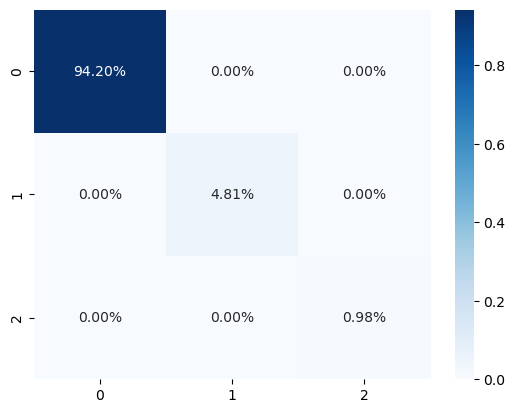

In [45]:
# Confusion matrix for the chosen fit.

cf_matrix = confusion_matrix(y_test,y_pred_RF)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Multiclass classification

### Prepare train and test datasets

In [46]:
def chi_p(chi_1, chi_2, theta_1, theta_2, q, DPhi):
    
    """
    Eq.(23) here: https://arxiv.org/pdf/2011.11948.pdf.
    """
    
    term1= (chi_1 * np.sin(theta_1))**2
    term2= (q * (4*q+3)/(4+3*q) * chi_2 * np.sin(theta_2))**2
    term3= 2 * (4*q+3)/(4+3*q) * chi_2 * np.sin(theta_2) * chi_1 * np.sin(theta_1) * np.cos(DPhi)
    
    return np.sqrt(term1 + term2 + term3)

In [47]:
# First sum up the m1 and m2 columns into a single total mass and the ratio into a mass ratio column
# Then calculate the symmetric mass ratio
df_subset['Mtot']  = df_subset.loc[:,['m1','m2']].sum(axis=1)
df_subset['sym_q'] = (df_subset['m1']*df_subset['m2'])/(df_subset['Mtot']**2)
df_subset['chip'] = chi_p(df_subset['chi1'], 
                           df_subset['chi2'], 
                           df_subset['theta1'], 
                           df_subset['theta2'], 
                           df_subset['q'], 
                           df_subset['dphi'])

# Take the log10 of the SNR and total mass for easier fits.
df_subset['logMtot'] = np.log10(df_subset['Mtot'])

/opt/miniconda3/envs/techstack/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
df_feature = df_subset[['channel', 'Mcl_0', 'zcl_form',  'logMtot','q','chi1','chi2']]
#[['channel',  'm1','m2','chi1','chi2','zmerge']]

<AxesSubplot:>

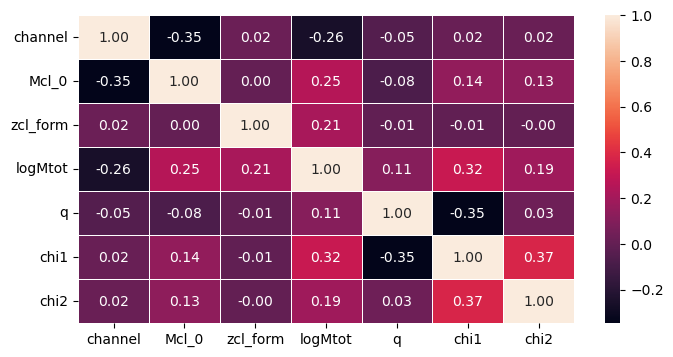

In [49]:
# Check correlations
plt.subplots(figsize=(8,4))
sns.heatmap(df_feature.corr(), annot=True, linewidths=0.5,fmt = "1.2f")

In [50]:
# Find predictors and target variable.

y = df_feature["channel"]
X = df_feature.drop("channel", axis=1)

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print('X shape train:', X_train.shape)
print('X shape test:', X_test.shape)

print('y shape train:', y_train.shape)
print('y shape test:', y_test.shape)

X shape train: (69976, 6)
X shape test: (29991, 6)
y shape train: (69976,)
y shape test: (29991,)


### Fitting with various algorithms

In [51]:
LogReg = LogisticRegression(penalty='l2', solver='newton-cg', 
                            multi_class ='multinomial',        # Change this for multinomial classification.
                            max_iter = 100)
LogReg.fit(X_train, y_train);

y_pred_LogReg = LogReg.predict(X_test)

print('Accuracy score:', accuracy_score(y_pred_LogReg, y_test))

/opt/miniconda3/envs/techstack/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/miniconda3/envs/techstack/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy score: 0.7148477876696342


/opt/miniconda3/envs/techstack/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [52]:
from xgboost import XGBClassifier


clf_XGBoost = XGBClassifier()
clf_XGBoost.fit(X_train, y_train)

y_pred_XGBoost = clf_XGBoost.predict(X_test)

print('Accuracy score:', accuracy_score(y_pred_XGBoost, y_test))

Accuracy score: 0.7748991364075889


In [53]:
clf_RF = RandomForestClassifier(n_estimators = 100, # Number of trees in the forest.
                                bootstrap = True    # Whether bootstrap samples are used when building trees
                               )
clf_RF.fit(X_train, y_train)

y_pred_RF = clf_RF.predict(X_test)

print('Accuracy score:', accuracy_score(y_pred_RF, y_test))

Accuracy score: 0.7834350305091528


In [54]:
# R2 with (channel, logM,q,Mcl,zcl) = 0.77
# R2 with (channel, logM,q,Mcl,zcl, chip, chieff) = 0.78
# R2 with (channel, logM,q,Mcl,zcl, chi1, chi2, zmerge) = 0.798.
# R2 with (channel, logM,q,Mcl,zcl, chi1, chi2, zmerge, vgw) = 0.797.

<AxesSubplot:>

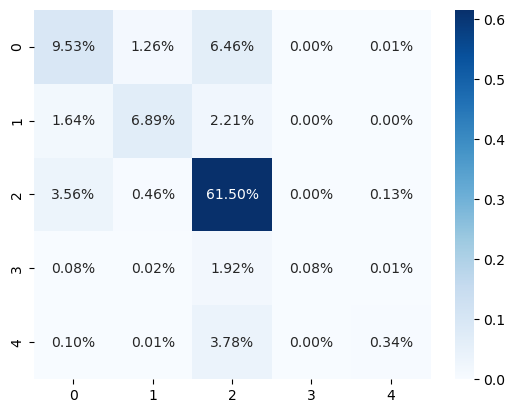

In [55]:
# Confusion matrix for the chosen fit.

cf_matrix = confusion_matrix(y_test,y_pred_RF)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')